In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from _data import *

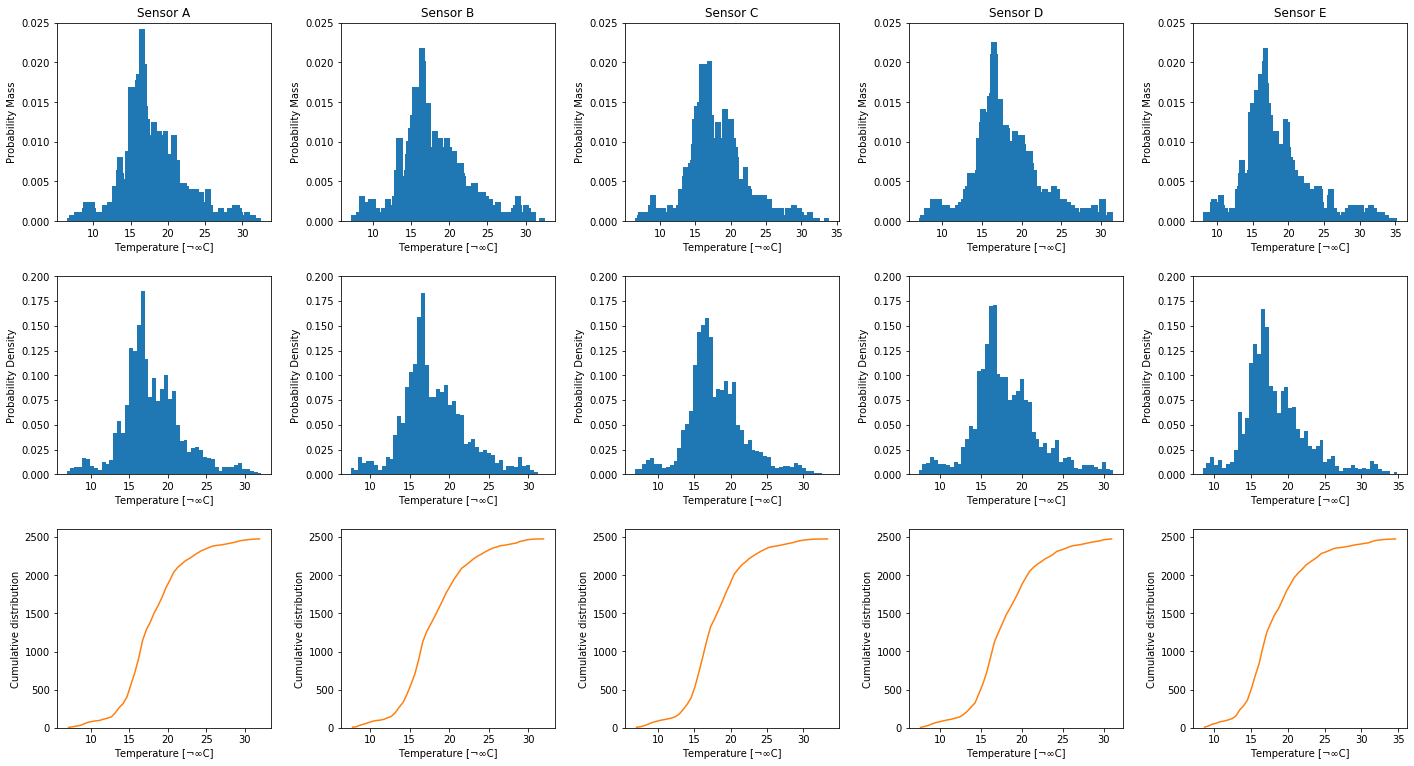

In [2]:
variable = 'Temperature'
fig = plt.figure(figsize=(20,11))
bins = 50

# PMF
for i, (sensor_name, sensor) in enumerate(data.items()):
    ax = plt.subplot2grid((3,5), (0,i))
    values = pd.Series(sensor[variable]['values'])
    values = values.value_counts() / len(values)
    
    ax.bar(values.index, values)
    ax.set_ylim(0, 0.025)
    ax.set_xlabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_ylabel('Probability Mass')
    ax.set_title(sensor_name)

# PDF
for i, (sensor_name, sensor) in enumerate(data.items()):
    ax = plt.subplot2grid((3,5), (1,i))
    values = sensor[variable]['values']
    
    ax.hist(values, bins=bins, density=True)
    ax.set_ylim(0, 0.2)
    ax.set_xlabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_ylabel('Probability Density')

# CDF
for i, (sensor_name, sensor) in enumerate(data.items()):
    ax = plt.subplot2grid((3,5), (2,i))
    values = sensor[variable]['values']
    
    a = ax.hist(values, bins=bins, cumulative=True, alpha=0.0)
    ax.plot(a[1][1:]-(a[1][1:]-a[1][:-1])/2, a[0])
    ax.set_xlabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_ylabel('Cumulative distribution')

    
plt.tight_layout(pad=2.0)
plt.show()